# Feature Engineering on games.csv

reading csv

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [35]:
# Move up one level from 'notebooks/' to the project root
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Define file paths
games_path = os.path.join(BASE_DIR, "data/raw/games.csv")

# Load CSV files into Pandas DataFrames
games_pd = pd.read_csv(games_path) if os.path.exists(games_path) else None

1. Log Transformation for **Final Price** and **Original Price**
The 'price_final' and 'price_original' distributions are right-skewed, with many low prices and few high prices. This skewness can negatively impact machine learning models. Applying a log transformation reduces skewness, making the distribution more symmetrical and closer to normal. This helps models generalize better and be less sensitive to outliers. `np.log1p` is used to handle zero prices and ensure numerical stability.

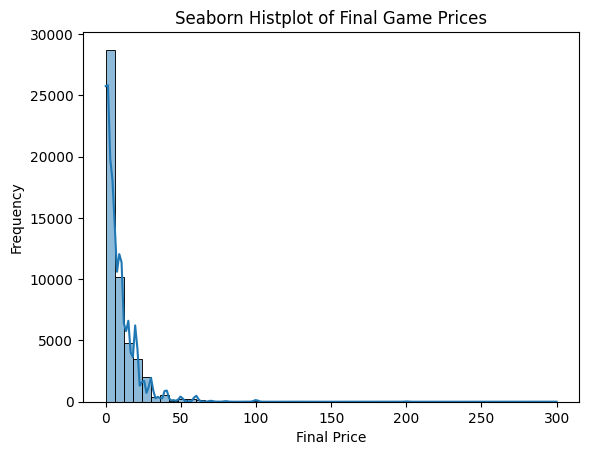

In [36]:
sns.histplot(games_pd['price_final'], bins=50, kde=True) # bins=100 for more detail
plt.title('Seaborn Histplot of Final Game Prices') # Title
plt.xlabel('Final Price') # X-axis label
plt.ylabel('Frequency') # Y-axis label
plt.show()

   price_final  price_final_log
0         9.99         2.396986
1         2.99         1.383791
2        14.99         2.771964
3        14.99         2.771964
4        11.99         2.564180


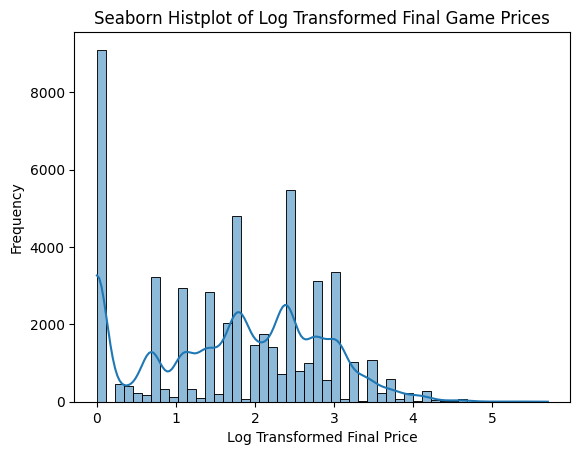

In [37]:
# Apply log1p for log transformation; handles zero prices and improves numerical stability for small prices.
games_pd['price_final_log'] = games_pd['price_final'].apply(np.log1p)

# Comparison Before After log
print(games_pd[['price_final', 'price_final_log']].head())

sns.histplot(games_pd['price_final_log'], bins=50, kde=True) # bins=100 for more detail
plt.title('Seaborn Histplot of Log Transformed Final Game Prices') # Title
plt.xlabel('Log Transformed Final Price') # X-axis label
plt.ylabel('Frequency') # Y-axis label
plt.show()

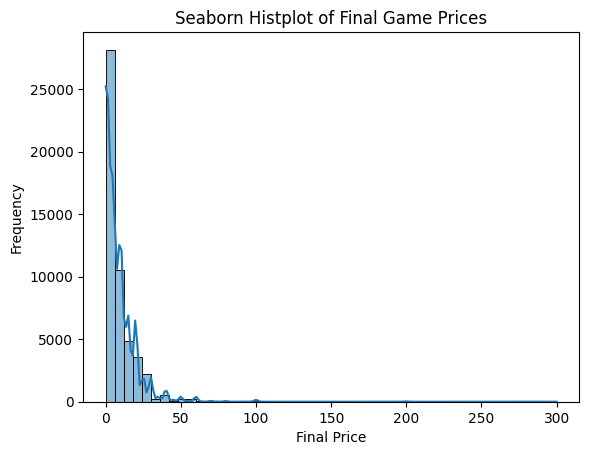

In [38]:
sns.histplot(games_pd['price_original'], bins=50, kde=True) # bins=100 for more detail
plt.title('Seaborn Histplot of Final Game Prices') # Title
plt.xlabel('Final Price') # X-axis label
plt.ylabel('Frequency') # Y-axis label
plt.show()

   price_original  price_original_log
0            9.99            2.396986
1            2.99            1.383791
2           14.99            2.771964
3           14.99            2.771964
4           11.99            2.564180


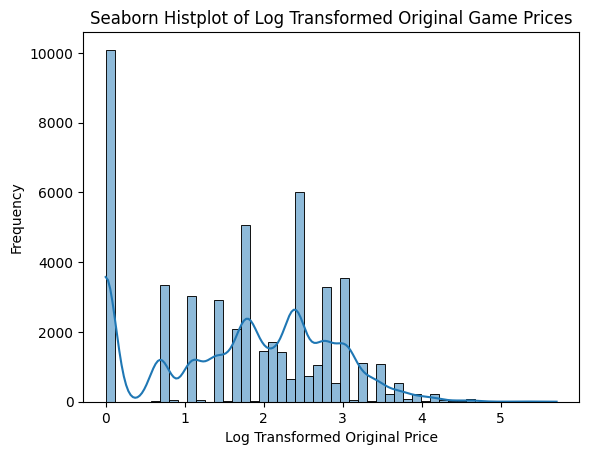

In [39]:
# Apply log1p for log transformation; handles zero prices and improves numerical stability for small prices.
games_pd['price_original_log'] = games_pd['price_original'].apply(np.log1p)

# Comparison Before After log
print(games_pd[['price_original', 'price_original_log']].head())

sns.histplot(games_pd['price_original_log'], bins=50, kde=True)
plt.title('Seaborn Histplot of Log Transformed Original Game Prices')
plt.xlabel('Log Transformed Original Price')
plt.ylabel('Frequency')
plt.show()

In [40]:
games_pd.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,price_final_log,price_original_log
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,2.396986,2.396986
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,1.383791,1.383791
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,2.771964,2.771964
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,2.771964,2.771964
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,2.564180,2.564180


2. Binary encoding for **win**, **mac**, **steam_deck**
- The features 'win', 'mac', 'linux', and 'steam_deck' are boolean values indicating platform compatibility. To use these in machine learning models, we convert them to binary integers (0 and 1) using `.astype(int)`. True becomes 1, and False becomes 0.

In [41]:
# Turn win, mac, linux and steam_deck from Boolean to Binary
games_pd['win_binary'] = games_pd['win'].astype(int)
games_pd['mac_binary'] = games_pd['mac'].astype(int)
games_pd['linux_binary'] = games_pd['linux'].astype(int)
games_pd['steam_deck_binary'] = games_pd['steam_deck'].astype(int)

# Should only be 0 and 1
print(games_pd['win_binary'].unique())
print(games_pd['mac_binary'].unique())
print(games_pd['linux_binary'].unique())
print(games_pd['steam_deck_binary'].unique())

[1 0]
[0 1]
[0 1]
[1 0]


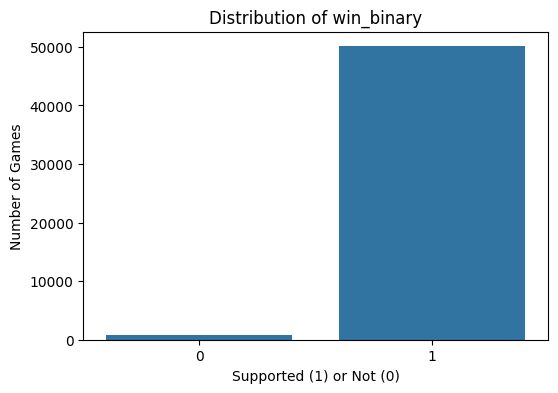

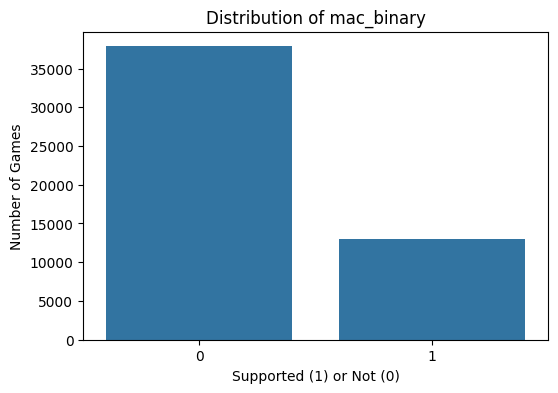

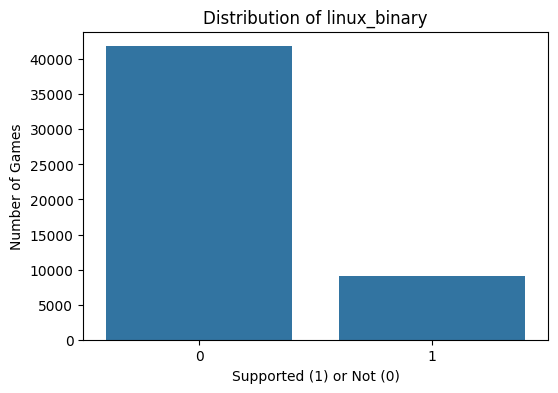

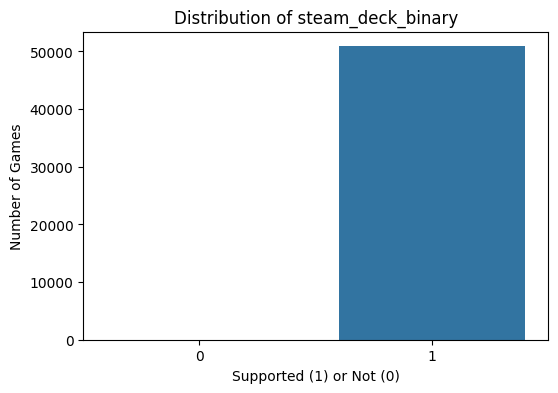

In [42]:
platform_columns = ['win_binary', 'mac_binary', 'linux_binary', 'steam_deck_binary']

for col in platform_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=games_pd, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Supported (1) or Not (0)')
    plt.ylabel('Number of Games')
    plt.show()

In [43]:
# Normalize positive_ratio
print(games_pd['win_binary'].unique()) # Print unique values in 'win_binary' column

[1 0]


In [44]:
games_pd_cp = games_pd.copy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Initialize StandardScaler

games_pd_cp[['price_final_scaled']] = scaler.fit_transform(games_pd_cp[['price_final']]) # Fit and transform 'price_final'
games_pd_cp[['price_original_scaled']] = scaler.fit_transform(games_pd_cp[['price_original']]) # Fit and transform 'price_original'

print(games_pd_cp[['price_final', 'price_final_scaled', 'price_original', 'price_original_scaled']].head()) # Show original and scaled prices

   price_final  price_final_scaled  price_original  price_original_scaled
0         9.99            0.118957            9.99               0.109779
1         2.99           -0.488996            2.99              -0.498552
2        14.99            0.553209           14.99               0.544300
3        14.99            0.553209           14.99               0.544300
4        11.99            0.292658           11.99               0.283587


In [45]:
# Checks out so copy back
games_pd = games_pd_cp.copy()

In [46]:
games_pd.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,price_final_log,price_original_log,win_binary,mac_binary,linux_binary,steam_deck_binary,price_final_scaled,price_original_scaled
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,2.396986,2.396986,1,0,0,1,0.118957,0.109779
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,1.383791,1.383791,1,0,0,1,-0.488996,-0.498552
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,2.771964,2.771964,1,1,1,1,0.553209,0.544300
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,2.771964,2.771964,1,0,0,1,0.553209,0.544300
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,2.564180,2.564180,1,1,0,1,0.292658,0.283587


3. Test out Ratios

**`reviews_per_dollar` Ratio: Value for Money**

This ratio quickly shows a game's **value for money** by comparing user reviews to its price.

*   **High Ratio:**  **Great Value.** Many reviews for the price.
*   **Low Ratio:**   **Poor Value.** Few reviews for the price.

**Formula:**

```
reviews_per_dollar = user_reviews / (price_final + 0.01)
```
*(Small addition prevents division by zero for free games)*

**Examples:**

|user_reviews | price_final  | reviews_per_dollar |
|--------------|--------|--------------------|
| 1000        | 10     | 1000 / (10+0.01) = 99.90 **(High Value)**| 
| 50          | 50     | 50 / (50+0.01) = 0.99 **(Low Value)**  |  

**In short: Higher ratio = better deal.**

In [47]:
# Value of the game, more people review it more value (heuristic).
# high value = popular and affordable
# People took time to review this
games_pd['reviews_per_dollar'] = games_pd['user_reviews'] / (games_pd['price_final'] + 0.01)
print(games_pd[['user_reviews', 'price_final', 'reviews_per_dollar']].head())

   user_reviews  price_final  reviews_per_dollar
0          2199         9.99          219.900000
1            21         2.99            7.000000
2          3722        14.99          248.133333
3           873        14.99           58.200000
4          8784        11.99          732.000000


In [48]:
print(f"Minimum reviews_per_dollar: {games_pd['reviews_per_dollar'].min()}")
print(f"Maximum reviews_per_dollar: {games_pd['reviews_per_dollar'].max()}")

Minimum reviews_per_dollar: 0.055
Maximum reviews_per_dollar: 221722600.0


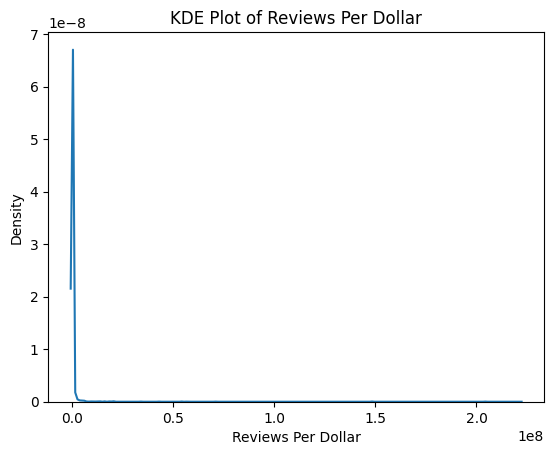

In [49]:
sns.kdeplot(games_pd['reviews_per_dollar']) # Create KDE plot for 'reviews_per_dollar'
plt.title('KDE Plot of Reviews Per Dollar') # Set plot title
plt.xlabel('Reviews Per Dollar') # X-axis label
plt.ylabel('Density') # Y-axis label
plt.show() # Show the plot

**reviews_per_dollar Ratio (Log Scale)**

- Log transformation reduces skew
- Reveals hidden trends that are otherwise dominated by high values
- Stops super popular games from hiding other good deals.

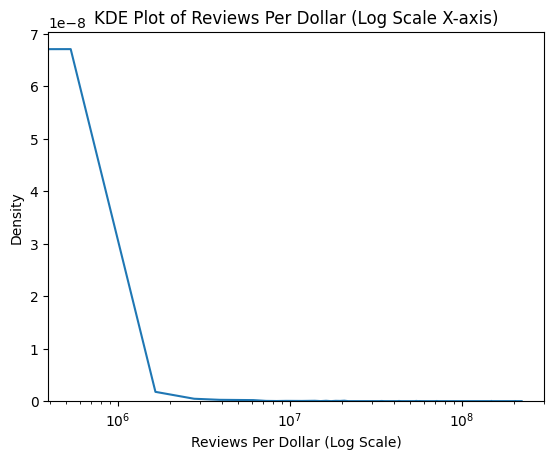

In [50]:
sns.kdeplot(games_pd['reviews_per_dollar']) # Create KDE plot as before
plt.title('KDE Plot of Reviews Per Dollar (Log Scale X-axis)') # Updated title
plt.xlabel('Reviews Per Dollar (Log Scale)') # Updated x-axis label
plt.ylabel('Density')
plt.xscale('log') # <---- ADD THIS LINE to set x-axis to logarithmic scale
plt.show()

**Positive Ratio Per Dollar**

- Measures how positively reviewed a game is per dollar spent.
- Useful to compare games across different price points fairly.
- Identifies cheap but well-rated vs. expensive and poorly rated games.
- Worth the price: Higher means yes, lower means no

to illustrate,

| positive_ratio | price_final | positive_ratio_per_dollar |
|---------------|------------|--------------------------|
| 90           | 10         | 90 / (10+0.01) = 8.99   |
| 87           | 5          | 87 / (5+0.01) = 17.38   |
| 80           | 20         | 80 / (20+0.01) = 3.99   |
| 75           | 50         | 75 / (50+0.01) = 1.50   |
| 95           | 0.01       | 95 / (0.01+0.01) = 4750.00 |



In [51]:
games_pd['positive_ratio_per_dollar'] = games_pd['positive_ratio'] / (games_pd['price_final'] + 0.01) # Calculate positive ratio per dollar, handle zero prices
print(games_pd[['positive_ratio', 'price_final', 'positive_ratio_per_dollar']].head()) # Show features and new ratio

   positive_ratio  price_final  positive_ratio_per_dollar
0              84         9.99                   8.400000
1              85         2.99                  28.333333
2              92        14.99                   6.133333
3              61        14.99                   4.066667
4              88        11.99                   7.333333


In [52]:
print(f"Minimum positive_ratio_per_dollar: {games_pd['positive_ratio_per_dollar'].min()}")
print(f"Maximum positive_ratio_per_dollar: {games_pd['positive_ratio_per_dollar'].max()}")

Minimum positive_ratio_per_dollar: 0.0
Maximum positive_ratio_per_dollar: 10000.0


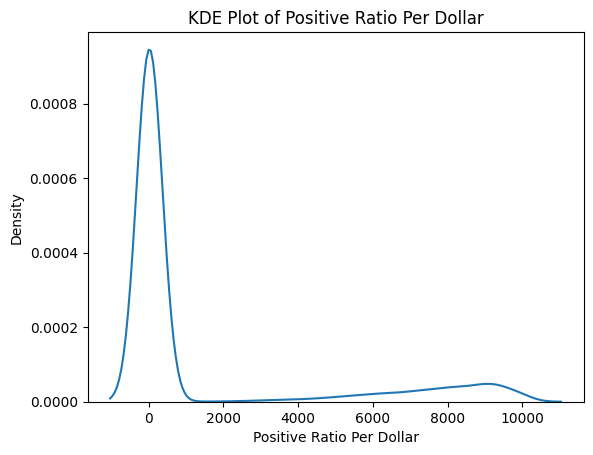

In [53]:
sns.kdeplot(games_pd['positive_ratio_per_dollar']) # Create KDE plot for 'positive_ratio_per_dollar'
plt.title('KDE Plot of Positive Ratio Per Dollar') # Set plot title
plt.xlabel('Positive Ratio Per Dollar') # X-axis label
plt.ylabel('Density') # Y-axis label
plt.show() # Show the plot

4. One Hot Ecnoding on **rating**
- ML models need numbers, not labels.
- Converts categorical variable (rating) into binary columns

In [54]:
games_pd = pd.get_dummies(games_pd, columns=['rating'], prefix='rating_encoded', drop_first=True)

encoded_rating_columns = games_pd.filter(like='rating_encoded').columns
games_pd[encoded_rating_columns] = games_pd[encoded_rating_columns].astype(int)
print(games_pd.filter(like='rating_encoded').head())


   rating_encoded_Mostly Negative  rating_encoded_Mostly Positive  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   rating_encoded_Negative  rating_encoded_Overwhelmingly Negative  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       0   
3                        0                                       0   
4                        0                                       0   

   rating_encoded_Overwhelmingly Positive  rating_encoded_Positive  \
0                                       0                        0   
1                       

In [55]:
games_pd.head()

,app_id,title,date_release,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,price_final_log,price_original_log,win_binary,mac_binary,linux_binary,steam_deck_binary,price_final_scaled,price_original_scaled,reviews_per_dollar,positive_ratio_per_dollar,rating_encoded_Mostly Negative,rating_encoded_Mostly Positive,rating_encoded_Negative,rating_encoded_Overwhelmingly Negative,rating_encoded_Overwhelmingly Positive,rating_encoded_Positive,rating_encoded_Very Negative,rating_encoded_Very Positive
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,84,2199,9.99,9.99,0.0,True,2.396986,2.396986,1,0,0,1,0.118957,0.109779,219.900000,8.400000,0,0,0,0,0,0,0,1
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,85,21,2.99,2.99,0.0,True,1.383791,1.383791,1,0,0,1,-0.488996,-0.498552,7.000000,28.333333,0,0,0,0,0,1,0,0
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,92,3722,14.99,14.99,0.0,True,2.771964,2.771964,1,1,1,1,0.553209,0.544300,248.133333,6.133333,0,0,0,0,0,0,0,1
3,226560,Escape Dead Island,2014-11-18,True,False,False,61,873,14.99,14.99,0.0,True,2.771964,2.771964,1,0,0,1,0.553209,0.544300,58.200000,4.066667,0,0,0,0,0,0,0,0
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,88,8784,11.99,11.99,0.0,True,2.564180,2.564180,1,1,0,1,0.292658,0.283587,732.000000,7.333333,0,0,0,0,0,0,0,1


In [56]:
games_pd['release_year'] = pd.to_datetime(games_pd['date_release']).dt.year # Extract year from 'date_release' and create 'release_year' column
games_pd['release_month'] = pd.to_datetime(games_pd['date_release']).dt.month # Extract month from 'date_release' and create 'release_month' column
games_pd['release_day'] = pd.to_datetime(games_pd['date_release']).dt.day # Extract day from 'date_release' and create 'release_day' column

games_pd[['date_release', 'release_year','release_month','release_day']].head()

,date_release,release_year,release_month,release_day
0,2008-11-21,2008,11,21
1,2011-08-03,2011,8,3
2,2013-04-24,2013,4,24
3,2014-11-18,2014,11,18
4,2014-10-27,2014,10,27


In [57]:
reference_date = pd.to_datetime('2025-01-01') # Define a reference date (early 2025)

games_pd['game_age_years'] = (reference_date - pd.to_datetime(games_pd['date_release'])).dt.days / 365.25 # Calculate game age in years

games_pd[['date_release', 'release_year', 'game_age_years']].head()

,date_release,release_year,game_age_years
0,2008-11-21,2008,16.112252
1,2011-08-03,2011,13.415469
2,2013-04-24,2013,11.690623
3,2014-11-18,2014,10.121834
4,2014-10-27,2014,10.182067


In [58]:
import pandas as pd # Make sure pandas is imported

# List of columns to EXCLUDE from the new DataFrame (these are the engineered features)
columns_to_exclude = [
    'date_release',
    'win',
    'mac',
    'linux',
    'steam_deck',
    "price_final",
    "price_original",
]

# Get all column names from the original games_pd DataFrame
all_columns = games_pd.columns.tolist()

# Find columns to KEEP (columns that are in 'all_columns' but NOT in 'columns_to_exclude')
columns_to_keep = [col for col in all_columns if col not in columns_to_exclude]

# Create a new DataFrame 'games_pd_feat_engined' by selecting only the columns to keep
games_pd_feat_engined = games_pd[columns_to_keep].copy() # Use .copy()


games_pd_feat_engined.head()

,app_id,title,positive_ratio,user_reviews,discount,price_final_log,price_original_log,win_binary,mac_binary,linux_binary,steam_deck_binary,price_final_scaled,price_original_scaled,reviews_per_dollar,positive_ratio_per_dollar,rating_encoded_Mostly Negative,rating_encoded_Mostly Positive,rating_encoded_Negative,rating_encoded_Overwhelmingly Negative,rating_encoded_Overwhelmingly Positive,rating_encoded_Positive,rating_encoded_Very Negative,rating_encoded_Very Positive,release_year,release_month,release_day,game_age_years
0,13500,Prince of Persia: Warrior Within™,84,2199,0.0,2.396986,2.396986,1,0,0,1,0.118957,0.109779,219.900000,8.400000,0,0,0,0,0,0,0,1,2008,11,21,16.112252
1,22364,BRINK: Agents of Change,85,21,0.0,1.383791,1.383791,1,0,0,1,-0.488996,-0.498552,7.000000,28.333333,0,0,0,0,0,1,0,0,2011,8,3,13.415469
2,113020,Monaco: What's Yours Is Mine,92,3722,0.0,2.771964,2.771964,1,1,1,1,0.553209,0.544300,248.133333,6.133333,0,0,0,0,0,0,0,1,2013,4,24,11.690623
3,226560,Escape Dead Island,61,873,0.0,2.771964,2.771964,1,0,0,1,0.553209,0.544300,58.200000,4.066667,0,0,0,0,0,0,0,0,2014,11,18,10.121834
4,249050,Dungeon of the ENDLESS™,88,8784,0.0,2.564180,2.564180,1,1,0,1,0.292658,0.283587,732.000000,7.333333,0,0,0,0,0,0,0,1,2014,10,27,10.182067


In [59]:
# Minimum release year
minimum_release_year = games_pd['release_year'].min()
print(f"Minimum Release Year: {minimum_release_year}")

maximum_release_year = games_pd['release_year'].max()
print(f"Maximum Release Year: {maximum_release_year}")

diff_in_year = maximum_release_year - minimum_release_year
print(f"Difference in Years: {diff_in_year}")

num_unique_years = games_pd['release_year'].nunique()
print(f"Number of Unique Years: {num_unique_years}")

Minimum Release Year: 1997
Maximum Release Year: 2023
Difference in Years: 26
Number of Unique Years: 27


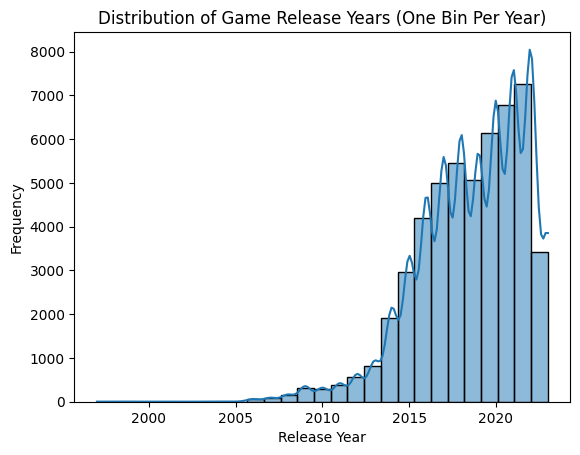

In [60]:
sns.histplot(games_pd['release_year'], bins=num_unique_years, kde=True) # Set bins to the number of unique years, disable KDE for clearer bars
plt.title('Distribution of Game Release Years (One Bin Per Year)') # Updated title
plt.xlabel('Release Year') # X-axis label
plt.ylabel('Frequency') # Y-axis label
plt.show() # Show plot

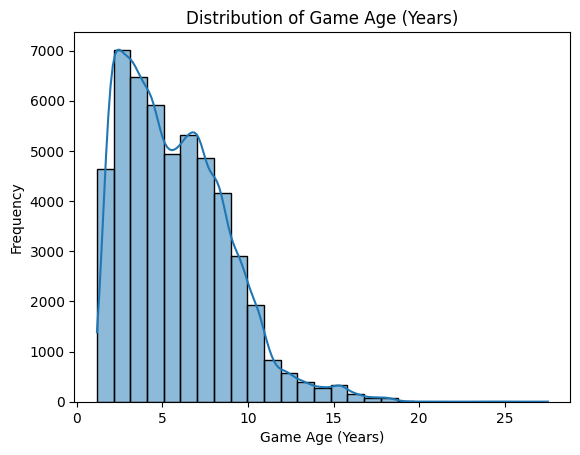

In [61]:
sns.histplot(games_pd['game_age_years'], bins=num_unique_years, kde=True) # Histogram for 'game_age_years' with 30 bins and KDE
plt.title('Distribution of Game Age (Years)') # Set title
plt.xlabel('Game Age (Years)') # X-axis label
plt.ylabel('Frequency') # Y-axis label
plt.show() # Show plot

In [62]:
from sklearn.preprocessing import StandardScaler
games_pd['user_reviews_log'] = games_pd['user_reviews'].apply(np.log1p)
scaler = StandardScaler()
games_pd['user_reviews_log_scaled'] = scaler.fit_transform(games_pd[['user_reviews_log']])
print(games_pd[['user_reviews', 'user_reviews_log', 'user_reviews_log_scaled']].head())

   user_reviews  user_reviews_log  user_reviews_log_scaled
0          2199          7.696213                 1.810612
1            21          3.091042                -0.722796
2          3722          8.222285                 2.100016
3           873          6.773080                 1.302776
4          8784          9.080801                 2.572305


In [63]:
games_pd.head()

,app_id,title,date_release,win,mac,linux,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,price_final_log,price_original_log,win_binary,mac_binary,linux_binary,steam_deck_binary,price_final_scaled,price_original_scaled,reviews_per_dollar,positive_ratio_per_dollar,rating_encoded_Mostly Negative,rating_encoded_Mostly Positive,rating_encoded_Negative,rating_encoded_Overwhelmingly Negative,rating_encoded_Overwhelmingly Positive,rating_encoded_Positive,rating_encoded_Very Negative,rating_encoded_Very Positive,release_year,release_month,release_day,game_age_years,user_reviews_log,user_reviews_log_scaled
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,84,2199,9.99,9.99,0.0,True,2.396986,2.396986,1,0,0,1,0.118957,0.109779,219.900000,8.400000,0,0,0,0,0,0,0,1,2008,11,21,16.112252,7.696213,1.810612
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,85,21,2.99,2.99,0.0,True,1.383791,1.383791,1,0,0,1,-0.488996,-0.498552,7.000000,28.333333,0,0,0,0,0,1,0,0,2011,8,3,13.415469,3.091042,-0.722796
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,92,3722,14.99,14.99,0.0,True,2.771964,2.771964,1,1,1,1,0.553209,0.544300,248.133333,6.133333,0,0,0,0,0,0,0,1,2013,4,24,11.690623,8.222285,2.100016
3,226560,Escape Dead Island,2014-11-18,True,False,False,61,873,14.99,14.99,0.0,True,2.771964,2.771964,1,0,0,1,0.553209,0.544300,58.200000,4.066667,0,0,0,0,0,0,0,0,2014,11,18,10.121834,6.773080,1.302776
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,88,8784,11.99,11.99,0.0,True,2.564180,2.564180,1,1,0,1,0.292658,0.283587,732.000000,7.333333,0,0,0,0,0,0,0,1,2014,10,27,10.182067,9.080801,2.572305


In [64]:
# List of columns to EXCLUDE from the new DataFrame (these are the engineered features)
columns_to_exclude = [
    'date_release',
    'win',
    'mac',
    'linux',
]
all_columns = games_pd.columns.tolist()

columns_to_keep = [col for col in all_columns if col not in columns_to_exclude]

games_pd_feat_engined = games_pd[columns_to_keep].copy()

games_pd_feat_engined.head()

,app_id,title,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,price_final_log,price_original_log,win_binary,mac_binary,linux_binary,steam_deck_binary,price_final_scaled,price_original_scaled,reviews_per_dollar,positive_ratio_per_dollar,rating_encoded_Mostly Negative,rating_encoded_Mostly Positive,rating_encoded_Negative,rating_encoded_Overwhelmingly Negative,rating_encoded_Overwhelmingly Positive,rating_encoded_Positive,rating_encoded_Very Negative,rating_encoded_Very Positive,release_year,release_month,release_day,game_age_years,user_reviews_log,user_reviews_log_scaled
0,13500,Prince of Persia: Warrior Within™,84,2199,9.99,9.99,0.0,True,2.396986,2.396986,1,0,0,1,0.118957,0.109779,219.900000,8.400000,0,0,0,0,0,0,0,1,2008,11,21,16.112252,7.696213,1.810612
1,22364,BRINK: Agents of Change,85,21,2.99,2.99,0.0,True,1.383791,1.383791,1,0,0,1,-0.488996,-0.498552,7.000000,28.333333,0,0,0,0,0,1,0,0,2011,8,3,13.415469,3.091042,-0.722796
2,113020,Monaco: What's Yours Is Mine,92,3722,14.99,14.99,0.0,True,2.771964,2.771964,1,1,1,1,0.553209,0.544300,248.133333,6.133333,0,0,0,0,0,0,0,1,2013,4,24,11.690623,8.222285,2.100016
3,226560,Escape Dead Island,61,873,14.99,14.99,0.0,True,2.771964,2.771964,1,0,0,1,0.553209,0.544300,58.200000,4.066667,0,0,0,0,0,0,0,0,2014,11,18,10.121834,6.773080,1.302776
4,249050,Dungeon of the ENDLESS™,88,8784,11.99,11.99,0.0,True,2.564180,2.564180,1,1,0,1,0.292658,0.283587,732.000000,7.333333,0,0,0,0,0,0,0,1,2014,10,27,10.182067,9.080801,2.572305


In [65]:
# Move up one level from 'notebooks/' to the project root
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Define the full path for the CSV file
output_dir = os.path.join(BASE_DIR, "data", "interim")
output_path = os.path.join(output_dir, "games_feat.csv")

# Ensure the directory exists
os.makedirs(output_dir, exist_ok=True)

# Save the DataFrame as a CSV file
games_pd_feat_engined.to_csv(output_path, index=False)

print(f"File saved at: {output_path}")

File saved at: c:\Users\wbrya\OneDrive\Documents\GitHub\MovieLens-Recommender-System\data\interim\games_feat.csv


**SUMMARY**

1. Log Transformation for **Final Price**
2. Binary encoding for **win**, **mac**, **steam_deck**
3. test out ratios
4. One Hot Ecnoding on **rating**
5. Save the feature engineered values as **games_feat_engineered.csv** into data/interim/ directory